In [1]:
#tutorial of prophet python 
#https://www.youtube.com/watch?v=2vF2xTUXJwM
import pandas as pd 
from prophet import Prophet

#not in used yet 
import matplotlib.pyplot as plt

#evaluate the model 
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error, mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
#reading all the data 
solar5 = pd.read_csv("Solar 5.csv")

In [3]:
solar5

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
0,0,0.00,2019-01-15 13:00:00,2019,1,15,13,0,Solar5
1,4,0.00,2019-01-15 14:00:00,2019,1,15,14,0,Solar5
2,8,0.00,2019-01-15 15:00:00,2019,1,15,15,0,Solar5
3,12,0.00,2019-01-15 16:00:00,2019,1,15,16,0,Solar5
4,16,0.00,2019-01-15 17:00:00,2019,1,15,17,0,Solar5
...,...,...,...,...,...,...,...,...,...
15726,62904,0.01,2020-10-31 19:00:00,2020,10,31,19,0,Solar5
15727,62908,1.16,2020-10-31 20:00:00,2020,10,31,20,0,Solar5
15728,62912,3.49,2020-10-31 21:00:00,2020,10,31,21,0,Solar5
15729,62916,6.53,2020-10-31 22:00:00,2020,10,31,22,0,Solar5


In [4]:
solar5['datetime']=pd.to_datetime(solar5['datetime'], format='%Y-%m-%d %H:%M:%S')

solar5= solar5.set_index('datetime')

solar5= solar5.asfreq('H') 

<AxesSubplot:xlabel='datetime'>

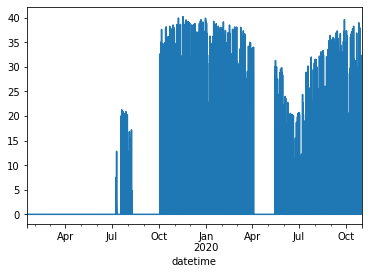

In [5]:
solar5["series_value"].plot()

In [6]:
'''
#Split Train-Val for Solar5
# ==============================================================================
start_train='2019-10-01 00:00'
end_train='2020-04-01 00:00'
start_val='2020-06-01 01:00'
end_val='2020-08-01 00:00'

start_test='2020-08-01 01:00'
'''
end_train='2020-08-01 00:00'
start_test='2020-08-01 01:00'

solar5train = solar5.loc[:end_train,:]
solar5test=solar5.loc[start_test:, :]


In [7]:
solar5train

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2019-01-15 13:00:00,0,0.00,2019,1,15,13,0,Solar5
2019-01-15 14:00:00,4,0.00,2019,1,15,14,0,Solar5
2019-01-15 15:00:00,8,0.00,2019,1,15,15,0,Solar5
2019-01-15 16:00:00,12,0.00,2019,1,15,16,0,Solar5
2019-01-15 17:00:00,16,0.00,2019,1,15,17,0,Solar5
...,...,...,...,...,...,...,...,...
2020-07-31 20:00:00,54076,0.00,2020,7,31,20,0,Solar5
2020-07-31 21:00:00,54080,0.06,2020,7,31,21,0,Solar5
2020-07-31 22:00:00,54084,5.65,2020,7,31,22,0,Solar5


In [8]:
solar5test

,Unnamed: 0,series_value,Year,Month,Day_of_Month,Hour,minutes,series_name
datetime,,,,,,,,
2020-08-01 01:00:00,54096,29.91,2020,8,1,1,0,Solar5
2020-08-01 02:00:00,54100,31.45,2020,8,1,2,0,Solar5
2020-08-01 03:00:00,54104,30.85,2020,8,1,3,0,Solar5
2020-08-01 04:00:00,54108,27.49,2020,8,1,4,0,Solar5
2020-08-01 05:00:00,54112,19.41,2020,8,1,5,0,Solar5
...,...,...,...,...,...,...,...,...
2020-10-31 19:00:00,62904,0.01,2020,10,31,19,0,Solar5
2020-10-31 20:00:00,62908,1.16,2020,10,31,20,0,Solar5
2020-10-31 21:00:00,62912,3.49,2020,10,31,21,0,Solar5


In [9]:
train_s5 = solar5train.reset_index()[["datetime","series_value"]]
train_s5.columns=["ds","y"]
train_s5

,ds,y
0,2019-01-15 13:00:00,0.00
1,2019-01-15 14:00:00,0.00
2,2019-01-15 15:00:00,0.00
3,2019-01-15 16:00:00,0.00
4,2019-01-15 17:00:00,0.00
...,...,...
13519,2020-07-31 20:00:00,0.00
13520,2020-07-31 21:00:00,0.06
13521,2020-07-31 22:00:00,5.65
13522,2020-07-31 23:00:00,9.14


In [10]:
model_s5 = Prophet()
model_s5.fit(train_s5)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [11]:
future_s5 = model_s5.make_future_dataframe(periods=2207,freq="H")
future_s5
#end 2020-10-31 23:00:00

,ds
0,2019-01-15 13:00:00
1,2019-01-15 14:00:00
2,2019-01-15 15:00:00
3,2019-01-15 16:00:00
4,2019-01-15 17:00:00
...,...
15726,2020-10-31 19:00:00
15727,2020-10-31 20:00:00
15728,2020-10-31 21:00:00
15729,2020-10-31 22:00:00


In [12]:
forecast_s5 = model_s5.predict(future_s5)
forecast_s5
#forecast_s5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-7320:] 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-15 13:00:00,-0.148684,-11.742180,5.172682,-0.148684,-0.148684,-3.368911,-3.368911,-3.368911,-3.584522,-3.584522,-3.584522,0.215612,0.215612,0.215612,0.0,0.0,0.0,-3.517595
1,2019-01-15 14:00:00,-0.148580,-11.286618,3.738773,-0.148580,-0.148580,-3.455013,-3.455013,-3.455013,-3.668116,-3.668116,-3.668116,0.213103,0.213103,0.213103,0.0,0.0,0.0,-3.603594
2,2019-01-15 15:00:00,-0.148477,-11.176454,4.693345,-0.148477,-0.148477,-3.377364,-3.377364,-3.377364,-3.586669,-3.586669,-3.586669,0.209305,0.209305,0.209305,0.0,0.0,0.0,-3.525840
3,2019-01-15 16:00:00,-0.148373,-11.470021,4.395993,-0.148373,-0.148373,-3.248403,-3.248403,-3.248403,-3.452676,-3.452676,-3.452676,0.204274,0.204274,0.204274,0.0,0.0,0.0,-3.396776
4,2019-01-15 17:00:00,-0.148269,-11.300609,3.948884,-0.148269,-0.148269,-3.271620,-3.271620,-3.271620,-3.469695,-3.469695,-3.469695,0.198075,0.198075,0.198075,0.0,0.0,0.0,-3.419889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15726,2020-10-31 19:00:00,5.038844,-7.267532,9.961160,0.742794,8.660561,-3.698770,-3.698770,-3.698770,-3.632345,-3.632345,-3.632345,-0.066425,-0.066425,-0.066425,0.0,0.0,0.0,1.340074
15727,2020-10-31 20:00:00,5.039414,-6.835857,11.297030,0.738458,8.663701,-3.014020,-3.014020,-3.014020,-2.954763,-2.954763,-2.954763,-0.059257,-0.059257,-0.059257,0.0,0.0,0.0,2.025395
15728,2020-10-31 21:00:00,5.039985,-5.498006,12.622811,0.734122,8.666840,-1.379140,-1.379140,-1.379140,-1.326469,-1.326469,-1.326469,-0.052671,-0.052671,-0.052671,0.0,0.0,0.0,3.660845
15729,2020-10-31 22:00:00,5.040555,-3.877143,14.509800,0.729786,8.669980,1.042585,1.042585,1.042585,1.089326,1.089326,1.089326,-0.046742,-0.046742,-0.046742,0.0,0.0,0.0,6.083140


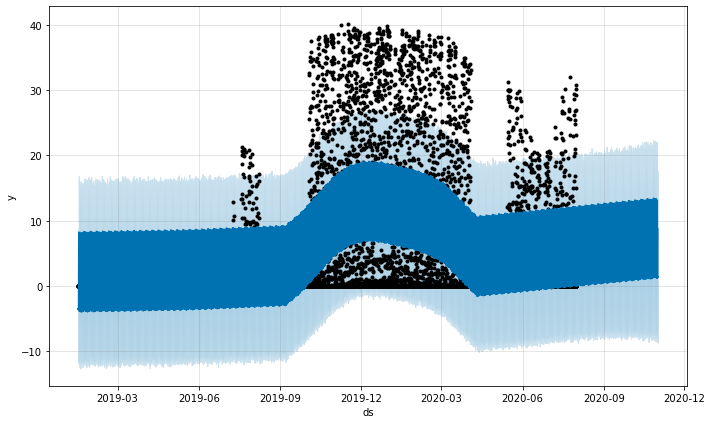

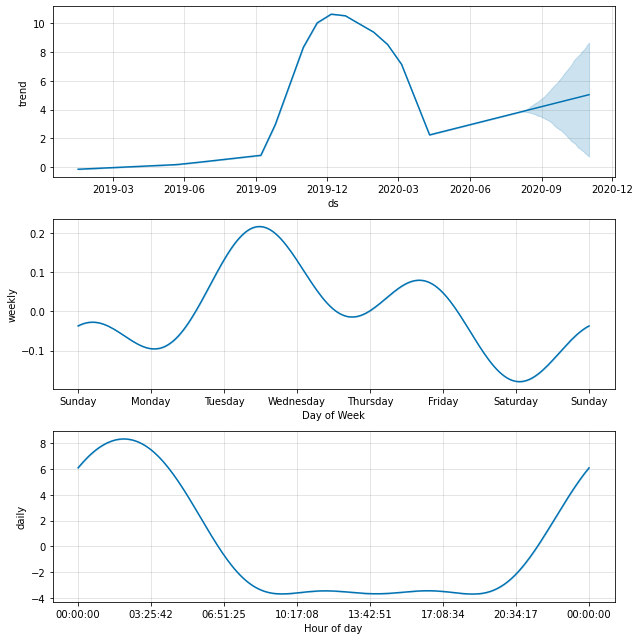

In [13]:
# plot the prediction 
fig= model_s5.plot(forecast_s5)
#plot predictions 
fig= model_s5.plot_components(forecast_s5)

In [14]:
forecast_s5["additive_terms"]
additive_terms =  pd.DataFrame(forecast_s5["additive_terms"])
print(additive_terms)

solar5["series_value"]
actual_value = pd.DataFrame(solar5.reset_index()["series_value"])
actual_value
print(actual_value)

       additive_terms
0           -3.368911
1           -3.455013
2           -3.377364
3           -3.248403
4           -3.271620
...               ...
15726       -3.698770
15727       -3.014020
15728       -1.379140
15729        1.042585
15730        3.720828

[15731 rows x 1 columns]
       series_value
0              0.00
1              0.00
2              0.00
3              0.00
4              0.00
...             ...
15726          0.01
15727          1.16
15728          3.49
15729          6.53
15730         15.93

[15731 rows x 1 columns]


In [15]:
sub =actual_value["series_value"]-additive_terms["additive_terms"]

output =  pd.DataFrame(solar5.reset_index()["datetime"])
output["subtraction"] = sub
output["additive_terms"] = forecast_s5["additive_terms"]
output["actual_value"] = actual_value["series_value"]
output = output.dropna()

output 

,datetime,subtraction,additive_terms,actual_value
0,2019-01-15 13:00:00,3.368911,-3.368911,0.00
1,2019-01-15 14:00:00,3.455013,-3.455013,0.00
2,2019-01-15 15:00:00,3.377364,-3.377364,0.00
3,2019-01-15 16:00:00,3.248403,-3.248403,0.00
4,2019-01-15 17:00:00,3.271620,-3.271620,0.00
...,...,...,...,...
15726,2020-10-31 19:00:00,3.708770,-3.698770,0.01
15727,2020-10-31 20:00:00,4.174020,-3.014020,1.16
15728,2020-10-31 21:00:00,4.869140,-1.379140,3.49
15729,2020-10-31 22:00:00,5.487415,1.042585,6.53


In [16]:
output.to_csv("s5_actual_additive.csv",index=False)